In [1]:
import pandas as pd # reading .csv files
import numpy as np  # array/image operations

In [2]:
# load data
train_data = pd.read_csv('dataset/sign_mnist_train.csv')
test_data = pd.read_csv('dataset/sign_mnist_test.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
# save labels from training data
train_labels = train_data['label'].values

# drop the 'label' column
train_data.drop('label', axis=1, inplace=True)
train_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [4]:
images = train_data.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [5]:
# convert labels to categorical values
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
train_labels


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [6]:
# split data into 70% training and 30% testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images,
                                                    train_labels,
                                                    test_size=0.3,
                                                    random_state=101)

In [7]:
# normalize data
x_train = x_train / 255
x_test = x_test / 255

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [9]:
# create the model
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(rate=0.20),

    Dense(units=24, activation='softmax')
])

In [10]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# train model
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=50,
                    batch_size=128)

Epoch 1/50
151/151 [==============================] - 2s 7ms/step - loss: 2.9235 - accuracy: 0.1230 - val_loss: 1.3818 - val_accuracy: 0.5628

In [12]:
print("Accuracy of the model is: " , model.evaluate(x_test, y_test)[1] * 100 , "%")

258/258 [==============================] - 0s 1ms/step - loss: 2.2942e-04 - accuracy: 1.0000
Accuracy of the model is:  100.0 %


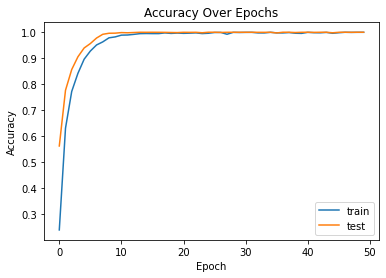

In [13]:
# plot accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Over Epochs")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])

plt.show()
